# Simple Logistic Regression - Heart Disease - Scatter Plot cholestrol vs target

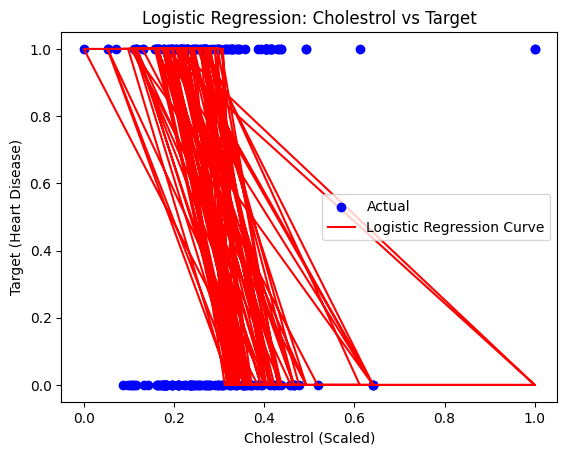

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')

# Extract independent and target variables
X = data[['chol']]
y = data['target']

# Min-Max scaling for 'chol'
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Plot the scatter plot with the regression curve
plt.figure()
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Logistic Regression Curve')
plt.xlabel('Cholestrol (Scaled)')
plt.ylabel('Target (Heart Disease)')
plt.title('Logistic Regression: Cholestrol vs Target')
plt.legend()
plt.show()

# Simple Linear Regression - Car Insurance - Scatter Plot - Insured value vs payment

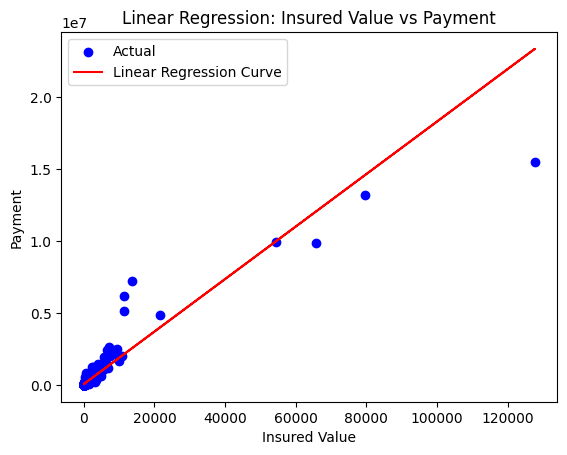

Mean Squared Error: 290225809666.27216
R-squared: 0.837746780432404


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/Car_Insurance_Dataset.csv')

# Extract independent and target variables
X = data[['Insured']]
y = data['Payment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the scatter plot with the regression curve
plt.figure()
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Curve')
plt.xlabel('Insured Value')
plt.ylabel('Payment')
plt.title('Linear Regression: Insured Value vs Payment')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Decision Tree - Breast Cancer - Visualize the tree - Histogram

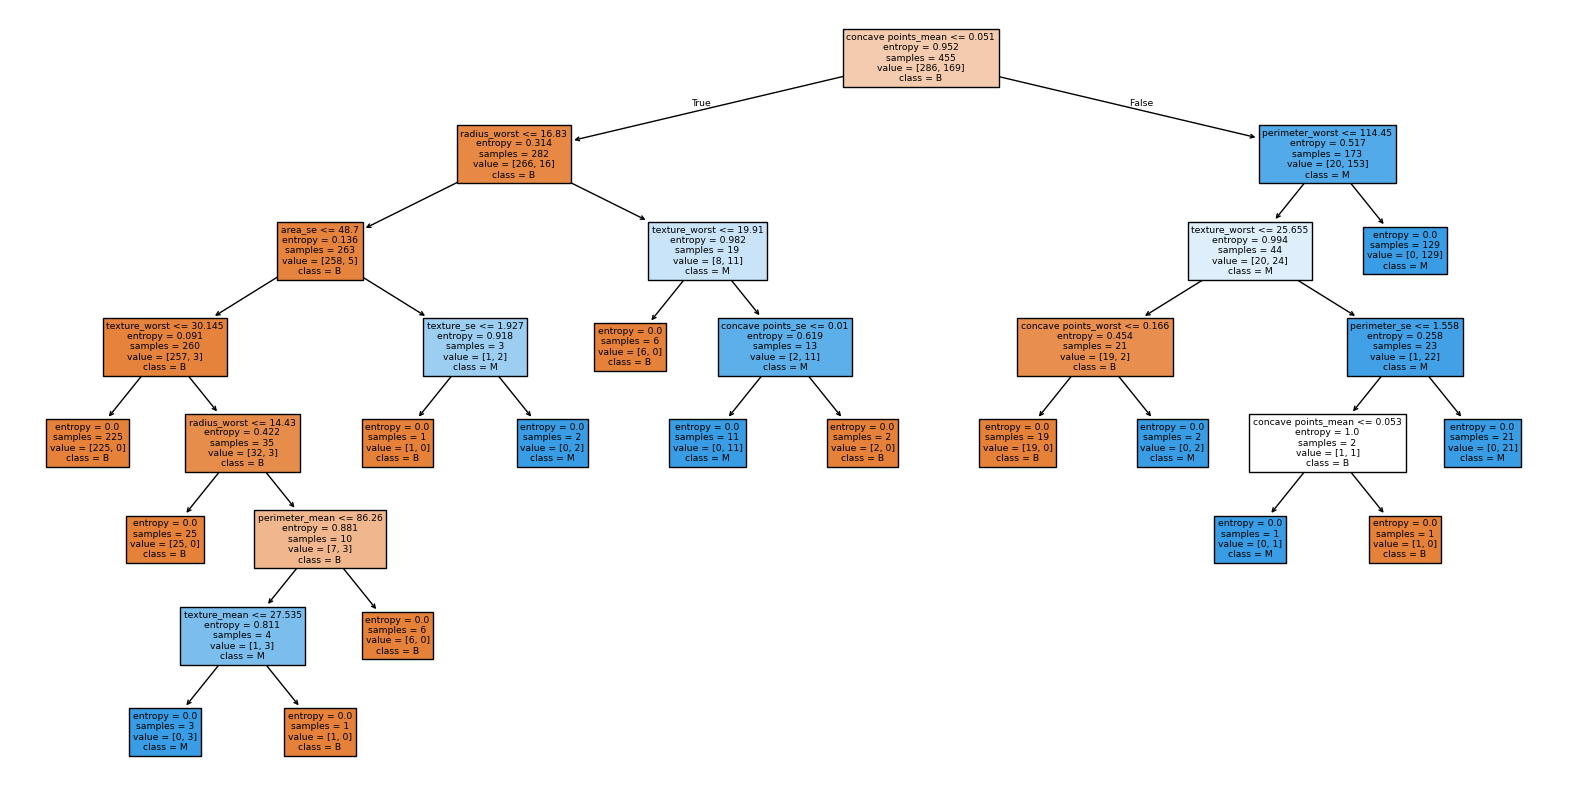

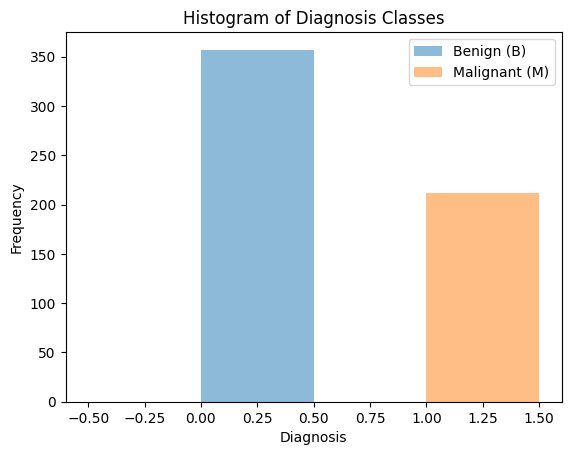

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/Breast_Cancer_Dataset.csv')

# Drop the 'id' column
data = data.drop('id', axis=1)

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
# 'B' will be 0, 'M' will be 1

# Separate features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier with 'entropy' criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.show()

# Plot the histogram for the classes 'B' and 'M'
plt.figure()
plt.hist(data[data['diagnosis'] == 0]['diagnosis'], bins=2, alpha=0.5, label='Benign (B)')
plt.hist(data[data['diagnosis'] == 1]['diagnosis'], bins=2, alpha=0.5, label='Malignant (M)')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram of Diagnosis Classes')
plt.legend()
plt.show()

# K-means - Iris - Scatter Plot - Petal width vs Length

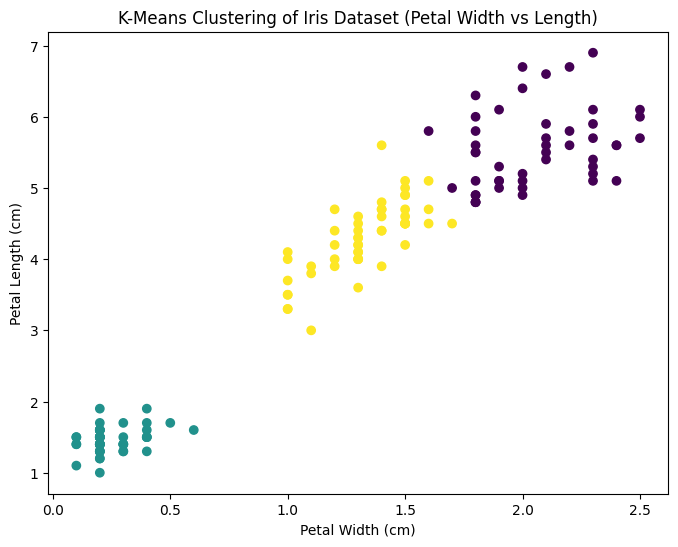

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = pd.read_csv('/content/Iris_Dataset.csv')

# Extract features for clustering
X = data[['petal.width', 'petal.length']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Plot the scatter plot of Petal Width vs Length, colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['petal.width'], data['petal.length'], c=data['cluster'], cmap='viridis')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering of Iris Dataset (Petal Width vs Length)')
plt.show()

# Ensemble - Car Insurance - Random Forest - Box Plot

Mean Squared Error: 23865698624.8345
R-squared: 0.9866576771943127


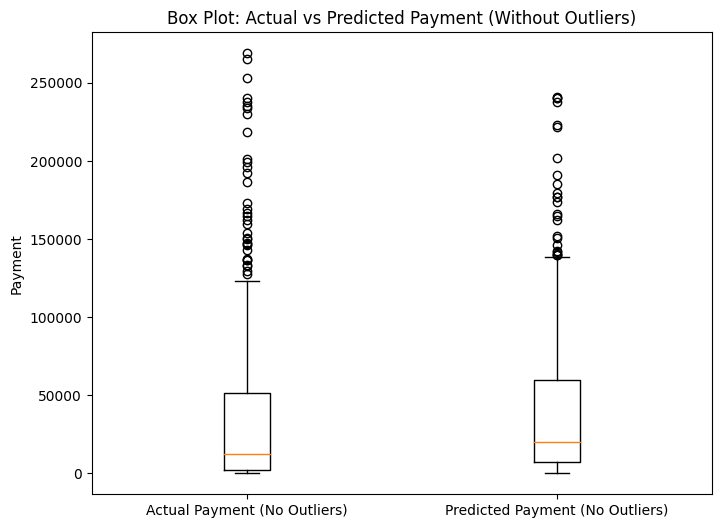

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
data = pd.read_csv('/content/Car_Insurance_Dataset.csv')

# Extract independent and target variables
X = data.drop('Payment', axis=1)  # Features
y = data['Payment']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_no_outliers


# Remove outliers from actual and predicted payments
y_test_no_outliers = remove_outliers_iqr(y_test)
y_pred_no_outliers = remove_outliers_iqr(y_pred)

# Plot box plots for actual vs predicted values without outliers
plt.figure(figsize=(8, 6))
plt.boxplot([y_test_no_outliers, y_pred_no_outliers],
            labels=['Actual Payment (No Outliers)', 'Predicted Payment (No Outliers)'])
plt.title('Box Plot: Actual vs Predicted Payment (Without Outliers)')
plt.ylabel('Payment')
plt.show()

# Multiple Linear Regression - Student Performance - Box Plot

Mean Squared Error: 4.545107899420576
R-squared: 0.9877353198949831


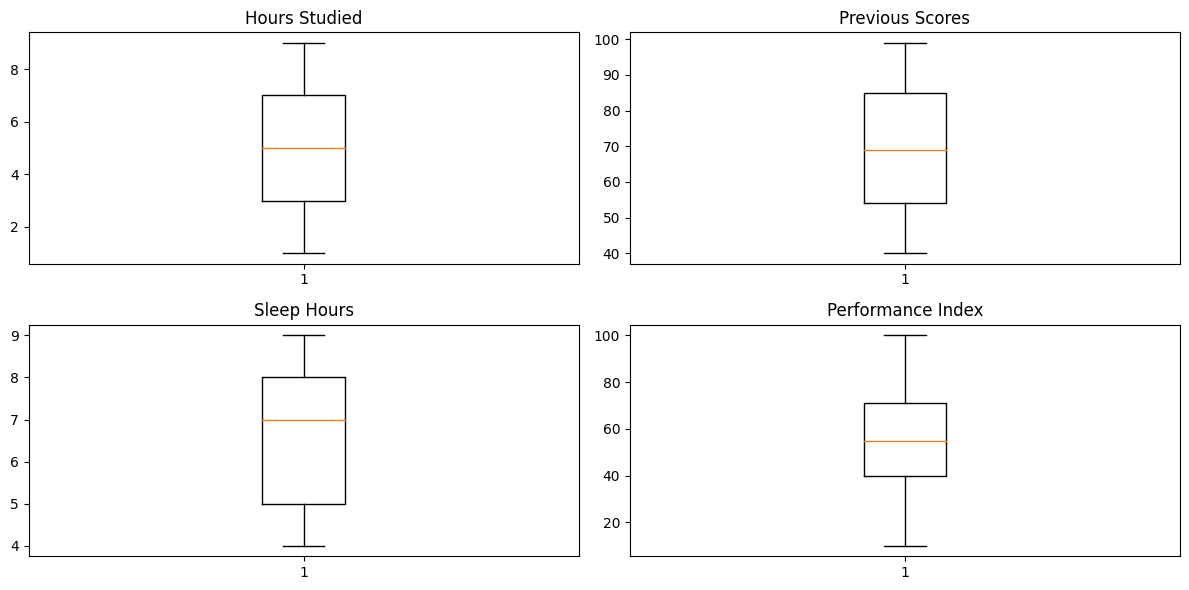

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/Student_Performance_Dataset.csv")

# Define independent and dependent variables
X = df[['Previous Scores', 'Hours Studied', 'Sleep Hours']]
y = df['Performance Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot box plots for the specified variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['Hours Studied'])
plt.title('Hours Studied')

plt.subplot(2, 2, 2)
plt.boxplot(df['Previous Scores'])
plt.title('Previous Scores')

plt.subplot(2, 2, 3)
plt.boxplot(df['Sleep Hours'])
plt.title('Sleep Hours')

plt.subplot(2, 2, 4)
plt.boxplot(df['Performance Index'])
plt.title('Performance Index')

plt.tight_layout()
plt.show()

# Multiple Logistic Regression - Heart Disease - Scatter plot Resting BP vs Cholestrol

Accuracy: 0.6146341463414634
Precision: 0.6224489795918368
Recall: 0.5922330097087378
F1-score: 0.6069651741293532


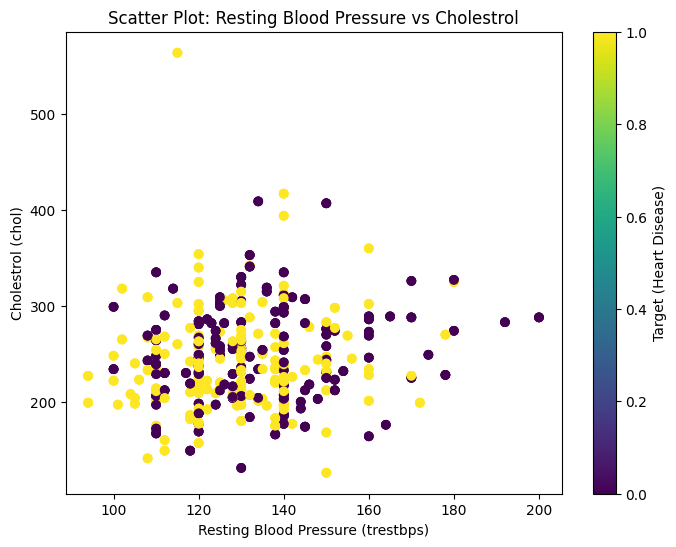

In [54]:
# Load the dataset
df = pd.read_csv("/content/Heart_Disease_Dataset.csv")

# Define independent and dependent variables
X = df[['age', 'trestbps', 'chol']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Scatter plot between 'trestbps' and 'chol'
plt.figure(figsize=(8, 6))
plt.scatter(df['trestbps'], df['chol'], c=df['target'], cmap='viridis')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Cholestrol (chol)')
plt.title('Scatter Plot: Resting Blood Pressure vs Cholestrol')
plt.colorbar(label='Target (Heart Disease)')
plt.show()

# Ensemble - XGBoost - Car Insurance - Boxplot

Mean Squared Error: 63647945592.13122
R-squared: 0.964417040348053


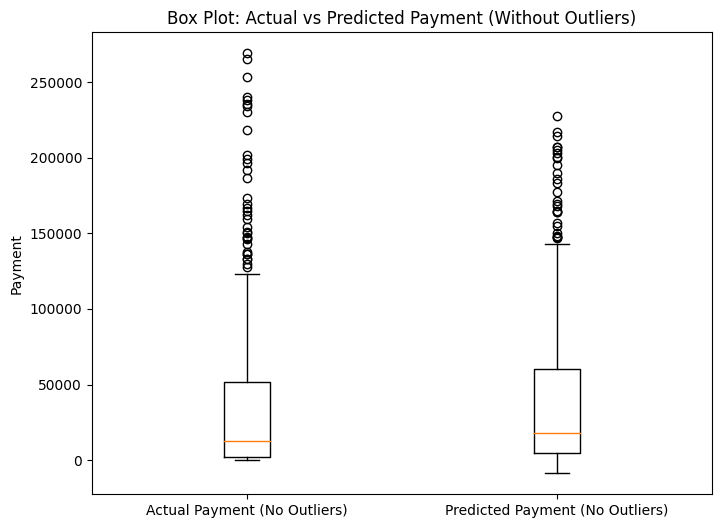

In [56]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Car_Insurance_Dataset.csv')

# Extract independent and target variables
X = data.drop('Payment', axis=1)  # Features
y = data['Payment']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_no_outliers


# Remove outliers from actual and predicted payments
y_test_no_outliers = remove_outliers_iqr(y_test)
y_pred_no_outliers = remove_outliers_iqr(y_pred)

# Plot box plots for actual vs predicted values without outliers
plt.figure(figsize=(8, 6))
plt.boxplot([y_test_no_outliers, y_pred_no_outliers],
            labels=['Actual Payment (No Outliers)', 'Predicted Payment (No Outliers)'])
plt.title('Box Plot: Actual vs Predicted Payment (Without Outliers)')
plt.ylabel('Payment')
plt.show()